# Importing Libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Importing Database

In [2]:
titanic = pd.read_csv ('titanic_BD.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Examining and Cleaning

Checking for missing data

In [3]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If there is missing data, does it make sense for these columns to have missing data?
How much data is missing? Will the lack of data affect the analysis?

1. Age (177 missing values)
   It makes sense. In that time, it wasn't unusual for the exact ages of all passengers not to be recorded (especially for third-class passengers).
   It will affect the analysis, however it can be updated by replacing them with the median age (either in general, or per gender and/or passenger class)

2. Cabin (687 missing values)
   It makes sense. Most passengers didn't have private cabins assigned.
   Cabins where mainly assigned to first-class, and some second-class passengers, so third-class passengers would naturally have missing values.
   It will affect the analysis, because it's missing too much to update them meaningfully. It is impossible to guess the cabin number/code. However, because so many values are missing, it's best to drop this column.

3. Embarked (2 missing values)
   It makes sense. Minor recording errors are normal.
   It will not affect the analysis, since it's a minor amount. However, it can be filled with the most common embarkation port, or dropped the two rows.

Deleting the cabin column from the dataframe

In [4]:
titanic.drop(columns = 'Cabin', inplace = True)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Updating the missing values in the age column, for women, using the median value of all female passengers

In [5]:
median_female_age = titanic.loc[titanic['Sex'] == 'female', 'Age'].median()

median_female_age

27.0

In [6]:
titanic.loc[(titanic['Sex'] == 'female') & (titanic['Age'].isnull()), 'Age'] = median_female_age

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Updating the missing values in the age column, for men, using the median value of all male passengers

In [7]:
median_male_age = titanic.loc[titanic['Sex'] == 'male', 'Age'].median()

median_male_age

29.0

In [8]:
titanic.loc[(titanic['Sex'] == 'male') & (titanic['Age'].isnull()), 'Age'] = median_male_age

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Filling in the missing values in the embarked column with the most commonly appearing value

In [9]:
titanic['Embarked'].value_counts().head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
titanic.fillna({'Embarked':'S'}, inplace=True)

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Analysing and Visualysing

# Mandatory questions

Creating a chart that shows the distribution of passengers by gender.

In [11]:
distribution_passengers_sex = titanic.groupby('Sex')['PassengerId'].count()

distribution_passengers_sex

Sex
female    314
male      577
Name: PassengerId, dtype: int64

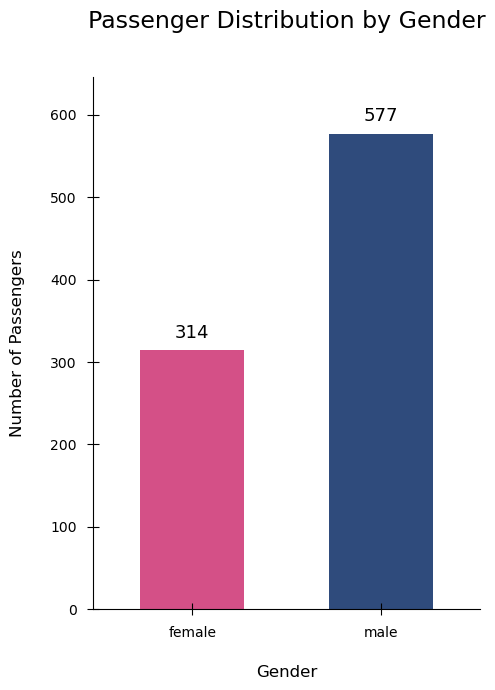

In [12]:
mplot = distribution_passengers_sex.plot.bar(color = ['#d45087', '#2f4b7c'],
                                            figsize = [5, 7],
                                            width = 0.55)

plt.title('Passenger Distribution by Gender', 
           fontweight ='light',
           fontsize = 17,
           pad = 35)

plt.xlabel('Gender', 
           fontweight ='light', 
           fontsize = 12,
           labelpad = 18)

plt.ylabel('Number of Passengers', 
           fontweight ='light',
           fontsize = 12,
           labelpad = 18)

plt.tick_params(axis = 'x', 
                direction='inout', 
                length = 8,
                pad = 8)

plt.tick_params(axis = 'y',
                direction='inout', 
                length = 8,
                pad = 8)

mplot.set_xticklabels(mplot.get_xticklabels(),
                      rotation = 0)

max_val = distribution_passengers_sex.max()

mplot.set_ylim(0, max_val * 1.12)

plt.bar_label(mplot.containers[0],
              size=13,
              padding=6)

plt.subplots_adjust(top=0.87,
                    bottom=0.18,
                    left=0.18,
                    right=0.95)

mplot.spines['top'].set_visible(False)
mplot.spines['right'].set_visible(False)

mplot.spines['bottom'].set_visible(True)
mplot.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()

Insight: there are more men than women

Creating a chart that shows the distribution of passengers by gender and whether they survived

In [13]:
distribution_passengers_sex_survived = titanic.groupby(['Sex', 'Survived'])['PassengerId'].count()

distribution_passengers_sex_survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

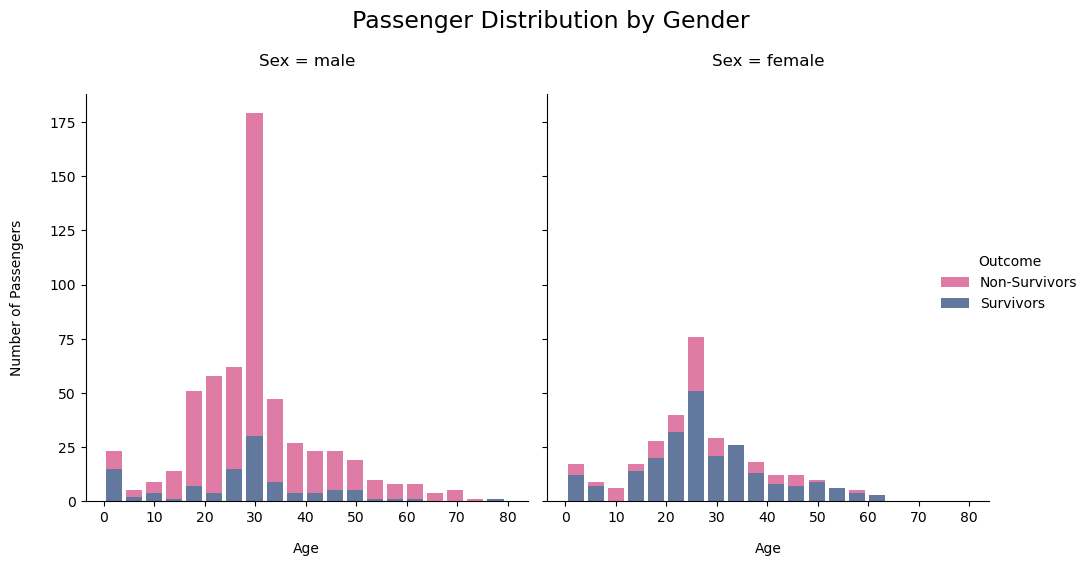

In [14]:
custom_colors = ['#d45087', '#2f4b7c']

survivors_chart = sns.displot(data=titanic,
                              x="Age",
                              hue="Survived",
                              col="Sex",
                              multiple="stack",
                              kind="hist",
                              binwidth=4,
                              height=5,
                              aspect=1,
                              palette=custom_colors)


for ax in survivors_chart.axes.ravel():
    for bar in ax.patches:
        bar.set_edgecolor("none")
        bar.set_width(bar.get_width() * 0.80)


new_labels = ['Non-Survivors', 'Survivors']
for t, l in zip(survivors_chart._legend.texts, new_labels):
    t.set_text(l)

survivors_chart._legend.set_title("Outcome")
survivors_chart._legend.get_title().set_fontweight("light")

for h in survivors_chart._legend.legend_handles:
    h.set_edgecolor("none")


for ax in survivors_chart.axes.ravel():
    ax.set_xlabel("Age")
    ax.xaxis.set_label_coords(0.5, -0.1)
    
    ax.set_ylabel("Number of Passengers")
    ax.yaxis.set_label_coords(-0.14, 0.5)
    
    ax.set_title(ax.get_title(), y=1.05)

survivors_chart.fig.suptitle('Passenger Distribution by Gender',
                             fontweight='light',
                             fontsize=17,
                             y=1.10)

plt.show()

Insight: more women survived proportionally. The greatest discrepancy is between the ages of 20 and 30.

Using a displot chart to view the age distribution of passengers by age.

In [15]:
data = titanic.select_dtypes(include=['number'])

corr_mtx = data.corr()

corr_mtx

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


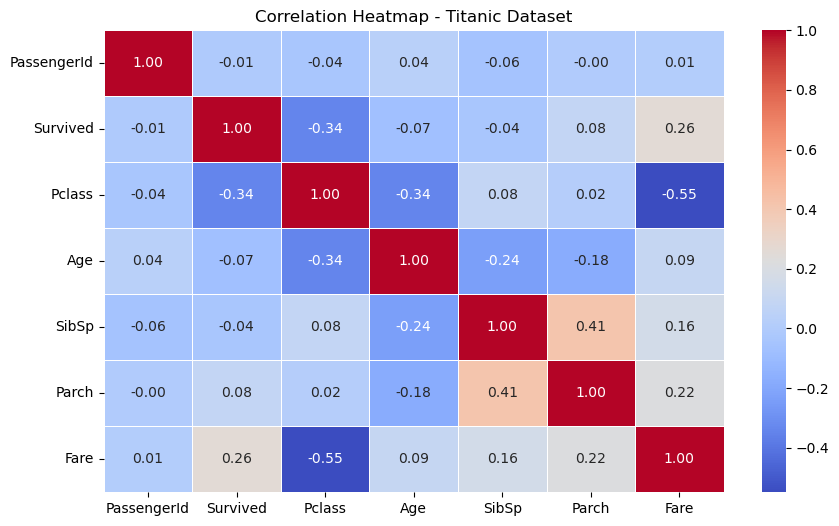

In [16]:
plt.figure(figsize=(10, 6))

sns.heatmap(corr_mtx, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap - Titanic Dataset")

plt.show()

Insight: the correlations between Fare and Pclass, and between SibSp and Parch are the most relevant. It is therefore assumed that: the higher the social class, the higher the travel cost, and when the SibSp value is filled in, the probability of the Parch column also being filled in increases (and vice versa).

# Own questions

What is the impact that age has on survival rates?

In [17]:
age_bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

titanic['AgeGroup'] = pd.cut(titanic['Age'],
                             bins=age_bins,
                             labels=age_labels,
                             include_lowest=True,
                             right=False)

titanic['AgeGroup'].value_counts().sort_index()

AgeGroup
0-5       40
5-10      22
10-20    102
20-30    397
30-40    167
40-50     89
50-60     48
60-70     19
70-80      6
80-90      1
Name: count, dtype: int64

In [18]:
survivor_counts = titanic[titanic['Survived'] == 1].groupby('AgeGroup', observed=True).size()

survivor_counts

AgeGroup
0-5       27
5-10      11
10-20     41
20-30    129
30-40     73
40-50     34
50-60     20
60-70      6
80-90      1
dtype: int64

In [19]:
total_counts = titanic.groupby('AgeGroup', observed=True).size()

percentages_survivor = ((survivor_counts / total_counts) * 100).round(2)

percentages_survivor

AgeGroup
0-5       67.50
5-10      50.00
10-20     40.20
20-30     32.49
30-40     43.71
40-50     38.20
50-60     41.67
60-70     31.58
70-80       NaN
80-90    100.00
dtype: float64

In [20]:
df = pd.DataFrame({"count": survivor_counts,
                   "percentage": percentages_survivor})

In [21]:
df = df.dropna(subset=["count", "percentage"],
               how="all")

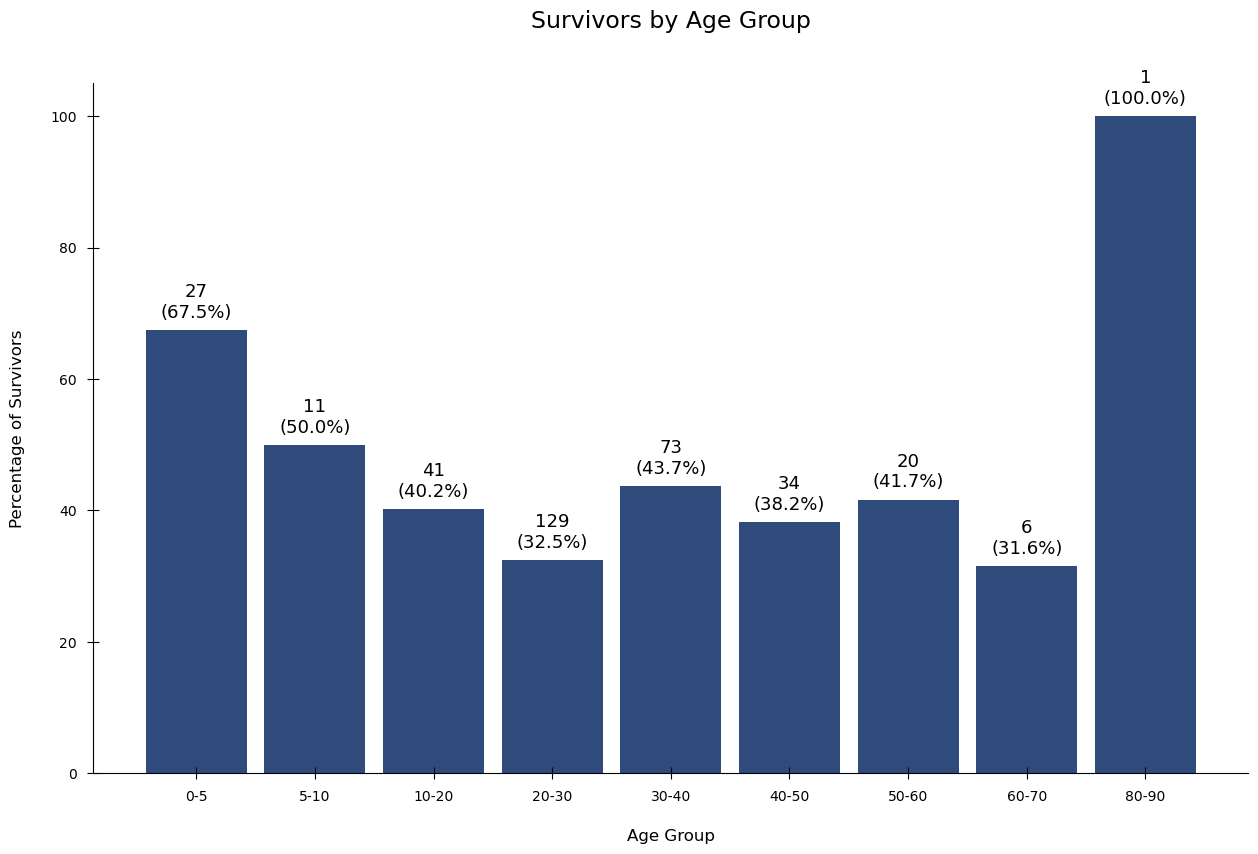

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

bars = ax.bar(df.index,
              df["percentage"],
              color="#2f4b7c",
              width=0.85)

labels = []
for count, p in zip(df["count"], df["percentage"]):
    if np.isnan(p):
        labels.append(f"{int(count)}\n(N/A)")
    else:
        labels.append(f"{int(count)}\n({p:.1f}%)")

plt.bar_label(bars, labels=labels, size=13, padding=6)

plt.title('Survivors by Age Group',
          fontweight='light',
          fontsize=17,
          pad=40)

plt.xlabel('Age Group',
           fontweight='light',
           fontsize=12,
           labelpad=18)

plt.ylabel('Percentage of Survivors',
           fontweight='light',
           fontsize=12,
           labelpad=18)

plt.tick_params(axis='x', direction='inout', length=8, pad=8)
plt.tick_params(axis='y', direction='inout', length=8, pad=8)

plt.subplots_adjust(top=0.87, bottom=0.18, left=0.18, right=0.95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Insight: more people between the ages of 20 and 30 survived, however, in percentage terms, this is one of the age groups with the lowest survival rate, meaning that more people died within this group.

The [30-40] age group was the second in which more people survived. Unlike the [30-40] age group, it has the highest survival rate, percentage-wise, which may indicate that the [20-30] age group was the group that helped save the most people.

In [23]:
non_survivor_counts = titanic[titanic['Survived'] == 0].groupby('AgeGroup', observed=True).size()

non_survivor_counts

AgeGroup
0-5       13
5-10      11
10-20     61
20-30    268
30-40     94
40-50     55
50-60     28
60-70     13
70-80      6
dtype: int64

In [24]:
non_sur_percentages = ((non_survivor_counts / total_counts) * 100).round(2)

non_sur_percentages

AgeGroup
0-5       32.50
5-10      50.00
10-20     59.80
20-30     67.51
30-40     56.29
40-50     61.80
50-60     58.33
60-70     68.42
70-80    100.00
80-90       NaN
dtype: float64

In [25]:
counts_df = pd.DataFrame({'Survivors': survivor_counts, 'Non-Survivors': non_survivor_counts})

counts_df

,Survivors,Non-Survivors
AgeGroup,,
0-5,27.0,13.0
5-10,11.0,11.0
10-20,41.0,61.0
20-30,129.0,268.0
30-40,73.0,94.0
40-50,34.0,55.0
50-60,20.0,28.0
60-70,6.0,13.0
70-80,NaN,6.0


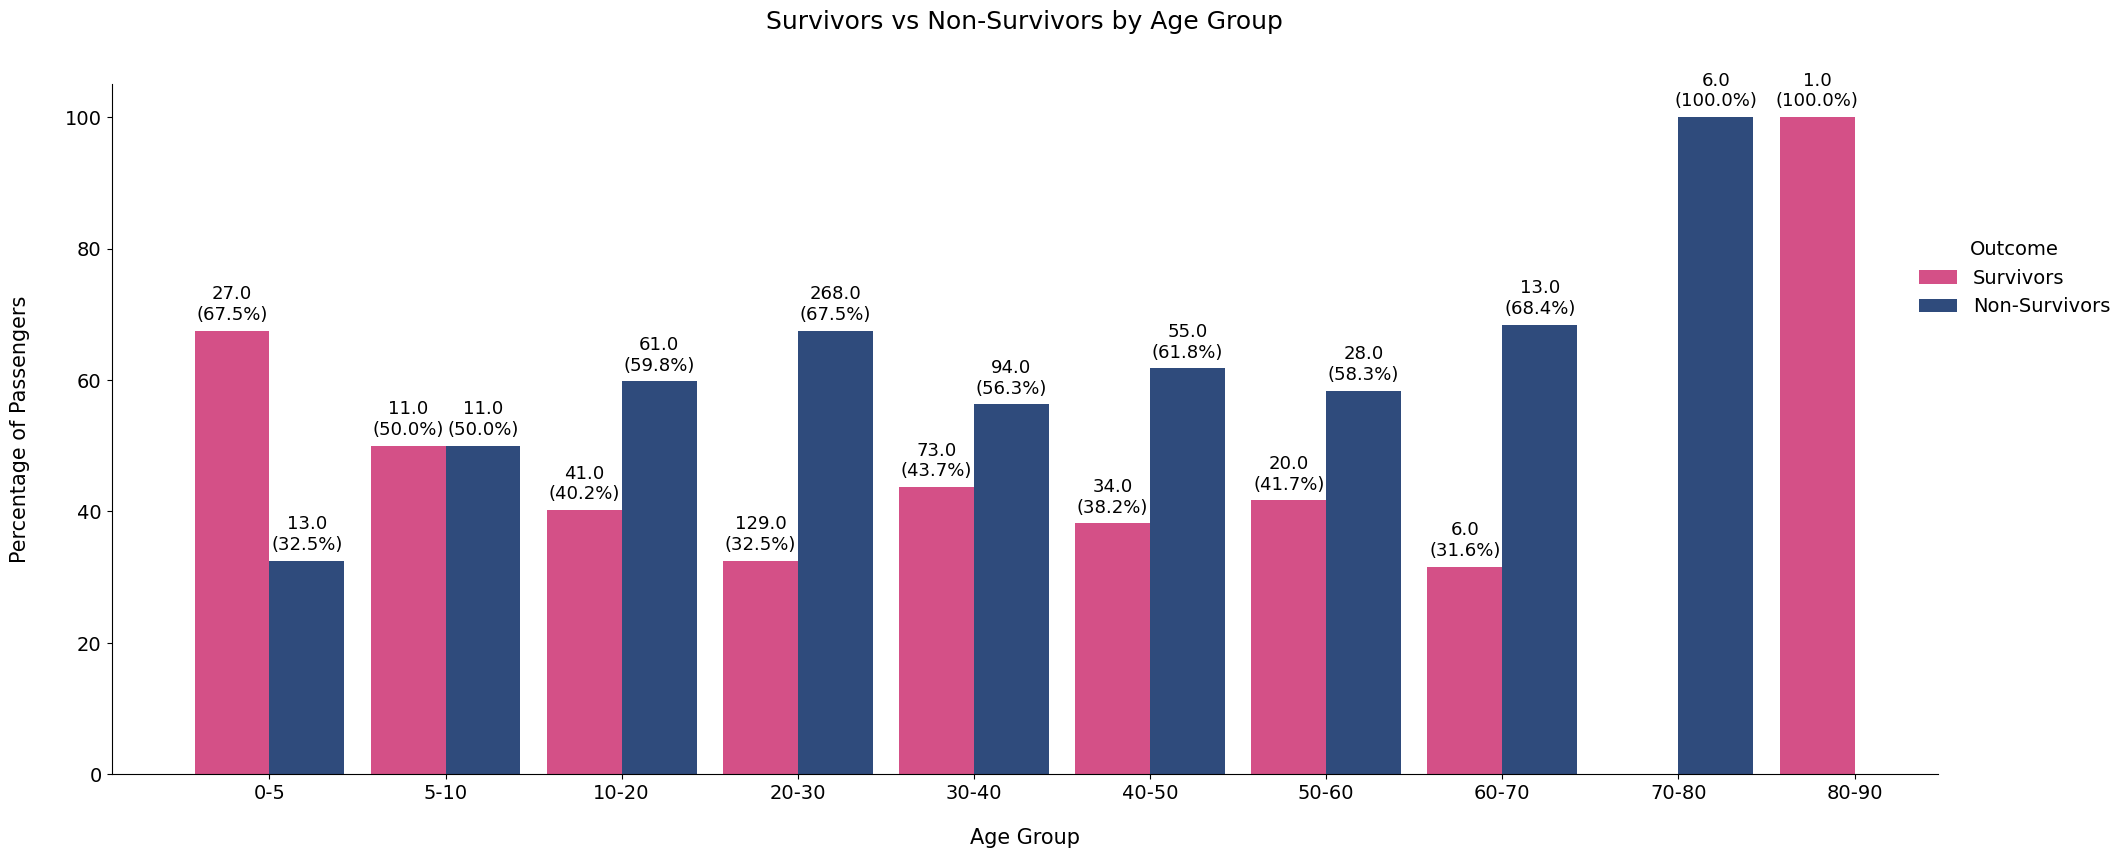

In [26]:
total_counts = counts_df.sum(axis=1)
percentages_df = counts_df.div(total_counts, axis=0) * 100

fig, ax = plt.subplots(figsize=(22, 10))

bar_width = 0.85 / 2
x = np.arange(len(counts_df.index))

bars_surv = ax.bar(x - bar_width/2,
                   percentages_df["Survivors"],
                   width=bar_width,
                   color="#d45087",
                   label="Survivors")

bars_nonsurv = ax.bar(x + bar_width/2,
                      percentages_df["Non-Survivors"],
                      width=bar_width,
                      color="#2f4b7c",
                      label="Non-Survivors")

def add_labels(bars, abs_values, percent_values):
    labels = []
    for abs_v, perc_v in zip(abs_values, percent_values):
        if np.isnan(perc_v):
            labels.append(f"{abs_v}\n(N/A)")
        else:
            labels.append(f"{abs_v}\n({perc_v:.1f}%)")
    ax.bar_label(bars, labels=labels, padding=5, fontsize=13)

add_labels(bars_surv,
           counts_df["Survivors"],
           percentages_df["Survivors"])

add_labels(bars_nonsurv,
           counts_df["Non-Survivors"],
           percentages_df["Non-Survivors"])

plt.title('Survivors vs Non-Survivors by Age Group',
          fontsize=18,
          fontweight='light',
          pad=40)

plt.xlabel('Age Group',
           fontsize=15,
           labelpad=18)

plt.ylabel('Percentage of Passengers',
           fontsize=15,
           labelpad=25)

plt.xticks(x, counts_df.index, rotation=0, fontsize=14)
plt.yticks(fontsize=14)

leg = plt.legend(title="Outcome",
                 fontsize=14,
                 title_fontsize=14,
                 frameon=False,
                 bbox_to_anchor=(0.98, 0.8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(top=0.87, bottom=0.18, left=0.12, right=0.95)

plt.show()

Insight: it can be seen a comparison between those who survived and those who did not survive by age group, which shows us more clearly that most passengers are in the [20-30] age group and that the majority of them did not survive, with a non-survival rate of 67.5%.

Although other groups, with a relevant sample such as the [10-20], [30-40], and [40-50], had fewer passengers who survived than those who did not survive, we can see that the greatest discrepancy between survivors and non-survivors is in the [20-30] age group, which may suggest that this is the group that helped others to survive, most likely because they had superior physical capacity compared to the others.

It can also be observed, from the age of 10 onwards, the number of survivors is lower, which may indicate that this group includes passengers who were possibly a priority up to the age of 15, but also passengers who used their physical abilities to help others.

What is the impact that class has on survival rates?

In [27]:
survival_by_class_gender = titanic.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId'].count().reset_index(name='Count')

survival_by_class_gender

,Pclass,Sex,Survived,Count
0,1,female,0,3
1,1,female,1,91
2,1,male,0,77
3,1,male,1,45
4,2,female,0,6
5,2,female,1,70
6,2,male,0,91
7,2,male,1,17
8,3,female,0,72
9,3,female,1,72


In [28]:
survival_by_class_gender['Percentage'] = survival_by_class_gender.groupby(['Pclass', 'Sex'])['Count'].transform(lambda x: 100 * x / x.sum()).round(2)

survival_by_class_gender

,Pclass,Sex,Survived,Count,Percentage
0,1,female,0,3,3.19
1,1,female,1,91,96.81
2,1,male,0,77,63.11
3,1,male,1,45,36.89
4,2,female,0,6,7.89
5,2,female,1,70,92.11
6,2,male,0,91,84.26
7,2,male,1,17,15.74
8,3,female,0,72,50.00
9,3,female,1,72,50.00


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


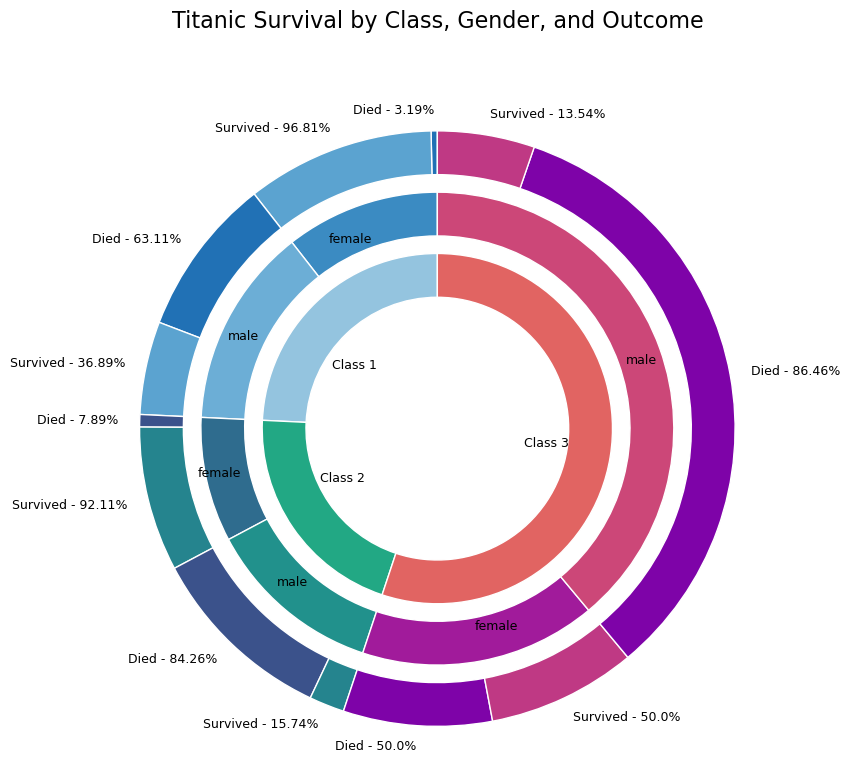

In [29]:
inner_data = survival_by_class_gender.groupby('Pclass', as_index=False)['Count'].sum()
middle_data = survival_by_class_gender.groupby(['Pclass', 'Sex'], as_index=False)['Count'].sum()
outer_data = survival_by_class_gender.copy()

class_colors = {1: plt.cm.Blues_r, 2: plt.cm.viridis, 3: plt.cm.plasma}
 
inner_colors = [class_colors[p](0.6) for p in inner_data['Pclass']]
 
middle_colors = [class_colors[row.Pclass](0.5 if row.Sex == 'male' else 0.35)
                 for _, row in middle_data.iterrows()]
 
outer_colors = [class_colors[row.Pclass](0.45 if row.Survived == 1 else 0.25)
                for _, row in outer_data.iterrows()]

inner_labels = [f"Class {p}" for p in inner_data['Pclass']]
middle_labels = [f"{row.Sex}" for _, row in middle_data.iterrows()]
outer_labels = [f"{'Survived' if s==1 else 'Died'} - {pct}%" for s, pct in zip(outer_data['Survived'], outer_data['Percentage'])]

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')

inner_ring = ax.pie(inner_data['Count'],
                    radius=1.0,
                    labels=inner_labels,
                    labeldistance=0.50,
                    colors=inner_colors,
                    startangle=90,
                    textprops={'fontsize': 9},
                    wedgeprops=dict(width=0.25, edgecolor='white'))
 
middle_ring = ax.pie(middle_data['Count'],
                     radius=1.35,
                     labels=middle_labels,
                     labeldistance=0.85,
                     colors=middle_colors,
                     startangle=90,
                     textprops={'fontsize': 9},
                     wedgeprops=dict(width=0.25, edgecolor='white'))
 
outer_ring = ax.pie(outer_data['Count'],
                    radius=1.7,
                    labels=outer_labels,
                    labeldistance=1.07,
                    colors=outer_colors,
                    startangle=90,
                    textprops={'fontsize': 9},
                    wedgeprops=dict(width=0.25, edgecolor='white'))
 
plt.title('Titanic Survival by Class, Gender, and Outcome', fontsize=16, pad=70)

plt.tight_layout()

plt.show()

Insight: most passengers were traveling in third class, the same class with the highest number of non-survivors, which immediately helps us understand why the overall survival rate is so low.

We also found that the lower the class, the lower the probability of survival. This suggests that certain conditions on board—such as proximity to lifeboats, type of cabin, and location of corridors—significantly influenced the outcome.

It is important to remember that third-class passengers were on the lower levels of the ship, with more obstacles and a greater distance to the evacuation points. These structural factors may have been decisive in how quickly they were able (or unable) to reach the lifeboats.

We also observed an interesting behavior:
— In the upper classes (1st and 2nd), women generally had a very high survival rate.
— Among men, survival varied much more between classes, showing that ‘women and children first’ also had an impact, not depending solely on class.


In [30]:
survived_only = survival_by_class_gender[survival_by_class_gender['Survived'] == 1]

survived_only

,Pclass,Sex,Survived,Count,Percentage
1,1,female,1,91,96.81
3,1,male,1,45,36.89
5,2,female,1,70,92.11
7,2,male,1,17,15.74
9,3,female,1,72,50.00
11,3,male,1,47,13.54


In [31]:
pivot = survived_only.pivot_table(index='Pclass',
                                  columns='Sex',
                                  values='Percentage',
                                  aggfunc='first')

pivot['Difference (female - male)'] = pivot['female'] - pivot['male']

pivot

Sex,female,male,Difference (female - male)
Pclass,,,
1,96.81,36.89,59.92
2,92.11,15.74,76.37
3,50.00,13.54,36.46


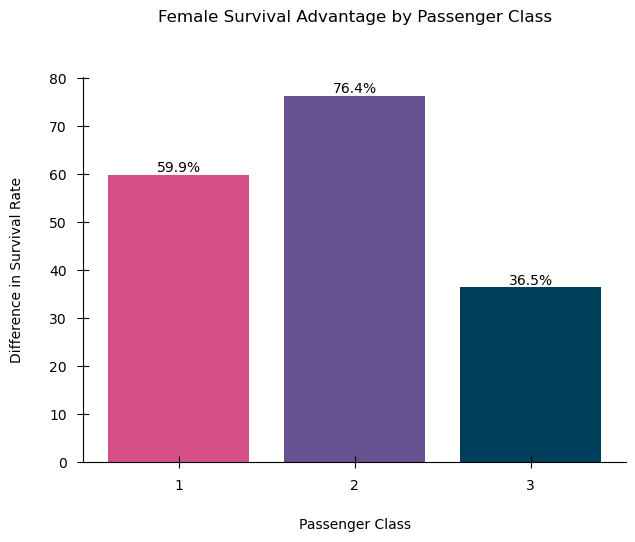

In [32]:
plt.figure(figsize=(7, 5))

bars = plt.bar(pivot.index,
               pivot['Difference (female - male)'],
               color=['#d45087', '#665191', '#003f5c'],
               edgecolor='none')

plt.title('Female Survival Advantage by Passenger Class', 
          fontweight='light',
          fontsize=12,
          pad=40)

plt.xlabel('Passenger Class', 
           fontweight='light',
           fontsize=10,
           labelpad=18)

plt.ylabel('Difference in Survival Rate', 
           fontweight='light',
           fontsize=10,
           labelpad=18)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f"{height:.1f}%",
             ha='center',
             va='bottom',
             fontsize=10)

plt.tick_params(axis='x', direction='inout', length=8, pad=8)
plt.tick_params(axis='y', direction='inout', length=8, pad=8)

plt.xticks([1, 2, 3], ['1', '2', '3'])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

Insight: when we compare the overall analysis with the segmented analysis. When we divide the data into smaller groups, it seems that women always have a greater advantage, especially in higher classes. However, when we analyze the data within each class, this advantage is not so apparent at the overall level.

This is therefore a Simpson's paradox, in which the observed trend is no longer the same. The advantage of women over men did not actually depend on social class, but on other types of contexts.


What is the impact that traveling alone (solo) or with family has on survival rates?

In [33]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

def travel_group (size) :
    return 'family' if size > 0 else  'solo'
    
titanic['group'] = titanic['FamilySize'].apply (travel_group)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-30,1,family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-40,1,family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-30,0,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-40,1,family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-40,0,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,20-30,0,solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,10-20,0,solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,20-30,3,family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,20-30,0,solo


In [34]:
valuecounts = titanic['group'].value_counts()

valuecounts

group
solo      537
family    354
Name: count, dtype: int64

In [35]:
percentages = ((valuecounts / valuecounts.sum()) * 100).round(2)

percentages

group
solo      60.27
family    39.73
Name: count, dtype: float64

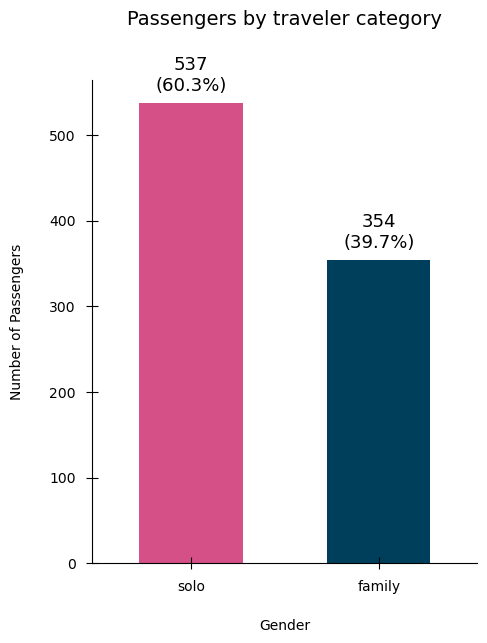

In [36]:
mplot = valuecounts.plot.bar(color = ['#d45087', '#003f5c'],
                                            figsize = [5, 7],
                                            width = 0.55)
 
plt.title('Passengers by traveler category', 
           fontweight ='light', 
           fontsize = 14,
           pad = 40)
 
plt.xlabel('Gender', 
           fontweight ='light', 
           fontsize = 10,
           labelpad = 18)
 
plt.ylabel('Number of Passengers', 
           fontweight ='light',
           fontsize = 10,
           labelpad = 18)
 
plt.tick_params(axis = 'x', 
                direction='inout', 
                length = 8,
                pad = 8)
 
plt.tick_params(axis = 'y',
                direction = 'inout',
                length = 8,
                pad = 8)
 
mplot.set_xticklabels(mplot.get_xticklabels(), rotation=0)

labels = [f'{count}\n({percent:.1f}%)' for count, percent in zip(valuecounts, percentages)]

plt.bar_label(mplot.containers[0],
              labels=labels,
              size=13,
              padding=6)
 
plt.subplots_adjust(top=0.87,
                    bottom=0.18,
                    left=0.18,
                    right=0.95)

mplot.spines['top'].set_visible(False)
mplot.spines['right'].set_visible(False)

mplot.spines['bottom'].set_visible(True)
mplot.spines['left'].set_visible(True)
 
plt.show()

Insight: there were more people traveling alone than with family.

In [37]:
grouped = titanic.groupby(['group', 'Sex', 'Survived']).size().reset_index(name='Count')

In [38]:
grouped['Percentage'] = grouped.groupby(['group', 'Sex'])['Count'].transform(lambda x: (x / x.sum()) * 100)

grouped['Percentage'] = grouped['Percentage'].round(2)

grouped

,group,Sex,Survived,Count,Percentage
0,family,female,0,54,28.72
1,family,female,1,134,71.28
2,family,male,0,121,72.89
3,family,male,1,45,27.11
4,solo,female,0,27,21.43
5,solo,female,1,99,78.57
6,solo,male,0,347,84.43
7,solo,male,1,64,15.57


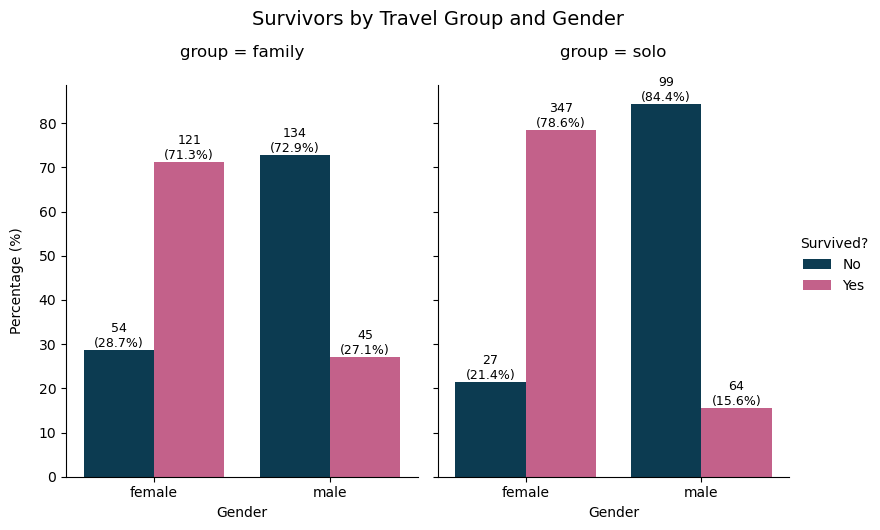

In [39]:
grouped['Survived?'] = grouped['Survived'].map({0: 'No', 1: 'Yes'})

palette = {'No':  '#003f5c',
           'Yes': '#d45087'}

g = sns.catplot(data=grouped,
                x='Sex',
                y='Percentage',
                hue='Survived?',
                col='group',
                kind='bar',
                height=5,
                aspect=0.8,
                palette=palette)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), pad=20)

for ax in g.axes.flat:
    ax.set_ylabel('Percentage (%)', labelpad=10)
    ax.yaxis.set_label_coords(-0.12, 0.5)
    ax.set_xlabel('Gender')

for ax, (group_name, df_group) in zip(g.axes.flat, grouped.groupby('group')):
    for patch, (_, row) in zip(ax.patches, df_group.iterrows()):
        height = patch.get_height()
        count = row['Count']

        ax.text(patch.get_x() + patch.get_width() / 2,
                height,
                f"{int(count)}\n({height:.1f}%)",
                ha='center',
                va='bottom',
                fontsize=9)

for ax in g.axes.flat:
    ax.grid(False)

plt.subplots_adjust(top=0.90)
plt.suptitle('Survivors by Travel Group and Gender',
             fontsize=14,
             y=1.05)

plt.show()

Insight: when comparing between the same gender, men have a higher survival rate when traveling with family. The opposite can be observed for women.

We therefore propose that men traveling alone tend to help others on board. Women, on the other hand, tend not to abandon their children/family when traveling in a group, resulting in lower survival rates than when traveling alone (they remain one of the priorities to be rescued, and since they are not emotionally attached to anyone present, they will not wait and will take the opportunity to escape when they can, thus presenting a higher survival rate).

Men traveling in groups will be the next priority after men traveling alone, as their families are in danger. Since they are more likely to receive help in groups, their survival rate increases. Men traveling alone may be the last to be saved since, as we observed earlier, this chart is further evidence that men traveling alone are the ones who help others the most, thus presenting a much lower survival rate than those traveling in groups.

In [40]:
mask = titanic['AgeGroup'].isin(['20-30', '30-40'])

In [41]:
df_counts = (titanic[mask].groupby(['AgeGroup', 'Sex', 'Survived'], observed=True).size().reset_index(name='Count'))

df_counts

,AgeGroup,Sex,Survived,Count
0,20-30,female,0,37
1,20-30,female,1,88
2,20-30,male,0,231
3,20-30,male,1,41
4,30-40,female,0,10
5,30-40,female,1,50
6,30-40,male,0,84
7,30-40,male,1,23


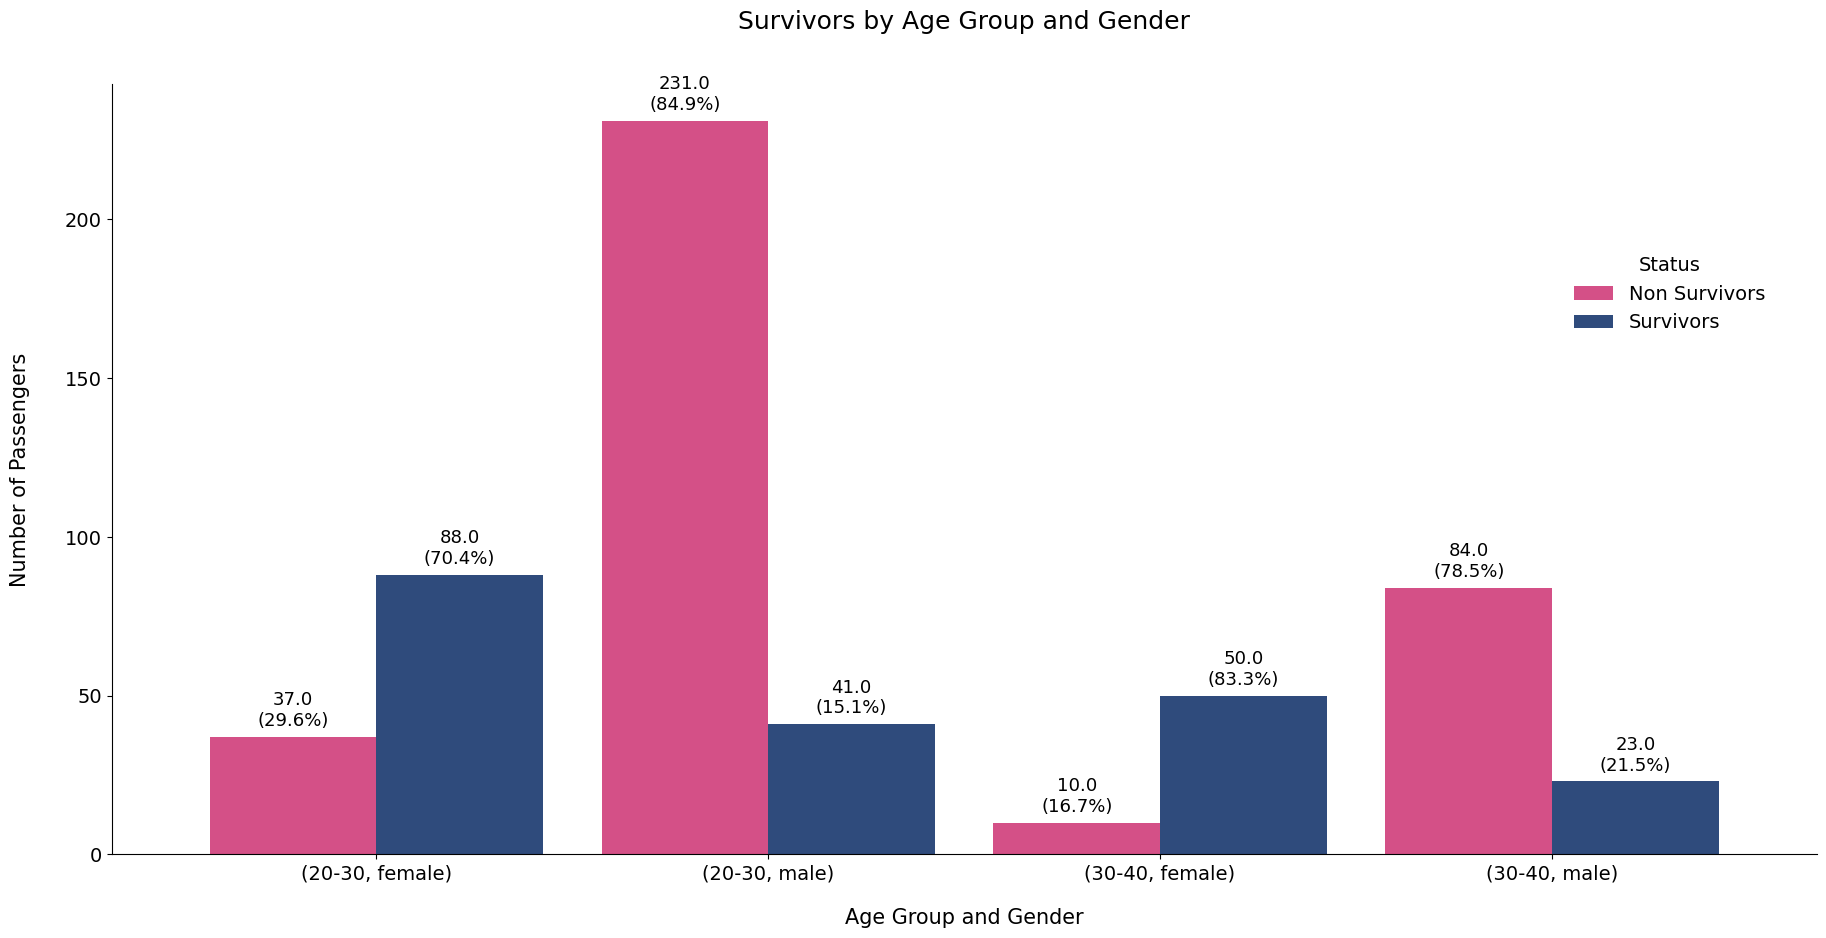

In [42]:
pivot_df_counts = df_counts.pivot_table(index=['AgeGroup', 'Sex'],
                                        columns='Survived',
                                        values='Count',
                                        fill_value=0,
                                        observed=True)

pivot_df_counts = pivot_df_counts.rename(columns={0: 'Non Survivors',
                                                  1: 'Survivors'})

# cores
colors = ['#d45087', '#2f4b7c']

# criar gráfico
ax = pivot_df_counts.plot(kind='bar',
                          figsize=(22, 10),
                          color=colors,
                          width=0.85)

plt.title('Survivors by Age Group and Gender',
          fontsize=18,
          fontweight='light',
          pad=40)

plt.xlabel('Age Group and Gender',
           fontsize=15,
           labelpad=18)

plt.ylabel('Number of Passengers',
           fontsize=15,
           labelpad=25)

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# legenda
leg = plt.legend(title="Status",
                 fontsize=14,
                 title_fontsize=14,
                 frameon=False,
                 bbox_to_anchor=(0.98, 0.80))

total_counts = pivot_df_counts.sum(axis=1)

for container, col_name in zip(ax.containers, pivot_df_counts.columns):

    counts = container.datavalues
    percentages = (counts / total_counts * 100)

    labels = []
    for c, p in zip(counts, percentages):
        if p == 0 or p != p:
            labels.append(f"{c}\n(N/A)")
        else:
            labels.append(f"{c}\n({p:.1f}%)")

    ax.bar_label(container,
                 labels=labels,
                 padding=5,
                 fontsize=13)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

Insight: it can be seen that men, who represent the two age groups with the highest passenger volume, have a higher number of non-survivors than survivors, unlike women.

This leads us to suggest that men, after all safety procedures have been followed, are the main factor in the rescue of passengers.

# Overall insight: 

The combination of factors reveals that survival did not depend solely on evacuation rules (“women and children first”), since:
- Young men traveling alone may have helped others;
- Women with children may have prioritized their families;
- Higher classes may have had better access to lifeboats.